<a href="https://colab.research.google.com/github/lilianapayares16-droid/BASE-CCVM-2024/blob/main/an_lisis_exploratorio_y_modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TFM - Predicción del riesgo cardiovascular mediante análisis exploratorio y modelos de Machine Learning sobre datos clínicos

In [ ]:
# Librerías base
import numpy as np
import pandas as pd
from IPython.display import display


# Para Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Para el modelado - Preprocesamiento
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,
                             RocCurveDisplay)

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sns.set_context("notebook")


# Fase I Analisis exploratorio de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/BASE CCVM 2024.xlsx")


In [ ]:
## Fase I — Análisis Exploratorio (EDA)
print("Filas, columnas:", df.shape)
display(df.sample(5, random_state=42))

display(df.info())
display(df.describe(include="all").T.head(20))


Filas, columnas: (7339, 25)


,fecha_nacimiento,edad,sexo,curso_vida,pertenencia_etnica,grupo_poblacional,Discapacidad,pais,departamento,municipio_divipola,...,imc,clasificacion_imc,tension_arterial_sistolica,tension_arterial_diastolica,creatinina,hemoglobina_glicosilada,albuminuria,colesterol_total,resultado_hdl,resultado_ldl
996,1965-08-05,59,F,Adultez,Ninguna,Otro grupo poblacional,Sin discapacidad,Colombia,CORDOBA,23001,...,30.297784,Obesidad,120,70,0.75,7.15,25.00,280.85,64.16,178.49
736,1979-04-03,45,M,Adultez,Ninguna,Otro grupo poblacional,Sin discapacidad,Colombia,CORDOBA,23001,...,29.878567,Sobrepeso,110,80,0.50,0.20,223.00,255.00,42.00,110.00
1244,1925-12-16,99,F,Vejez,Ninguna,Otro grupo poblacional,Sin discapacidad,Colombia,CORDOBA,23001,...,22.031726,Normal,140,70,0.90,0.80,22.00,128.00,65.00,90.00
1181,1954-01-28,70,F,Vejez,Ninguna,Otro grupo poblacional,Sin discapacidad,Colombia,CORDOBA,23001,...,28.577961,Sobrepeso,140,80,0.89,0.20,12.81,231.62,36.83,152.06
3307,1974-10-04,50,F,Adultez,Ninguna,Otro grupo poblacional,Sin discapacidad,Colombia,CORDOBA,23001,...,32.049982,Obesidad,120,80,1.01,0.20,25.00,268.57,70.40,180.86


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7339 entries, 0 to 7338
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   fecha_nacimiento             7339 non-null   datetime64[ns]
 1   edad                         7339 non-null   int64         
 2   sexo                         7339 non-null   object        
 3   curso_vida                   7339 non-null   object        
 4   pertenencia_etnica           7339 non-null   object        
 5   grupo_poblacional            7339 non-null   object        
 6   Discapacidad                 7339 non-null   object        
 7   pais                         7339 non-null   object        
 8   departamento                 7339 non-null   object        
 9   municipio_divipola           7339 non-null   int64         
 10  municipio_residencia         7339 non-null   object        
 11  longitud                     7339 non-null 

None

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
fecha_nacimiento,7339,NaN,NaN,NaN,1959-12-20 14:27:50.745333120,1922-01-05 00:00:00,1952-04-03 00:00:00,1958-10-24 00:00:00,1967-09-25 00:00:00,2009-05-05 00:00:00,NaN
edad,7339.0,NaN,NaN,NaN,64.548712,15.0,57.0,66.0,72.0,102.0,11.538241
sexo,7339,2,F,4039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curso_vida,7339,5,Vejez,5045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pertenencia_etnica,7339,3,Ninguna,7301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grupo_poblacional,7339,3,Otro grupo poblacional,7317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discapacidad,7339,3,Sin discapacidad,7329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pais,7339,1,Colombia,7339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departamento,7339,1,CORDOBA,7339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
municipio_divipola,7339.0,NaN,NaN,NaN,23175.366535,23001.0,23001.0,23001.0,23417.0,23855.0,241.600082


In [ ]:
# Clasificación de variables
# Variables Sociodemográficas

vars_demo = [
    'edad',
    'sexo',
    'curso_vida'
]


In [ ]:
# Variables Antropométricas

vars_antrop = [
    'peso',
    'talla',
    'imc',
    'clasificacion_imc'
]


In [ ]:
# Variables Clínicas cardiovasculares

vars_clinicas = [
    'tension_arterial_sistolica',
    'tension_arterial_diastolica'
]


In [ ]:
# Variables Metabólicas, renales y lipídicas

vars_labs = [
    'creatinina',
    'hemoglobina_glicosilada',
    'albuminuria',
    'colesterol_total',
    'resultado_hdl',
    'resultado_ldl'
]


In [ ]:
# Variables numéricas

vars_numericas = [
    'edad',
    'peso',
    'talla',
    'imc',
    'tension_arterial_sistolica',
    'tension_arterial_diastolica',
    'creatinina',
    'hemoglobina_glicosilada',
    'albuminuria',
    'colesterol_total',
    'resultado_hdl',
    'resultado_ldl'
]

# Estadística descriptiva
desc_numericas = df[vars_numericas].describe().T

desc_numericas


,count,mean,std,min,25%,50%,75%,max
edad,7339.0,64.548712,11.538241,15.000000,57.000000,66.0000,72.000000,102.000000
peso,7339.0,74.528819,14.700363,10.000000,65.000000,73.0000,83.000000,174.000000
talla,7339.0,1.638786,0.087176,1.200000,1.570000,1.6400,1.700000,2.240000
imc,7339.0,27.682129,4.652587,2.892834,24.618104,27.1809,30.267771,61.707989
tension_arterial_sistolica,7339.0,124.201254,12.710124,70.000000,120.000000,120.0000,130.000000,220.000000
tension_arterial_diastolica,7339.0,76.780215,8.472813,20.000000,70.000000,80.0000,80.000000,130.000000
creatinina,7339.0,1.066546,0.317319,0.400000,0.880000,1.0200,1.215000,3.440000
hemoglobina_glicosilada,7339.0,2.534032,3.316469,0.200000,0.200000,0.7000,6.000000,18.270000
albuminuria,7339.0,51.221300,54.388294,10.000000,25.000000,28.0000,51.000000,399.000000
colesterol_total,7339.0,191.233411,48.920252,38.000000,155.290000,188.0000,221.000000,393.880000


In [ ]:
#Variables categoricas
vars_categoricas = [
    'sexo',
    'curso_vida',
    'clasificacion_imc'
]

for var in vars_categoricas:
    print(f"\nDistribución de {var}")
    display(
        pd.DataFrame({
            'Frecuencia': df[var].value_counts(dropna=False),
            'Porcentaje (%)': df[var].value_counts(normalize=True, dropna=False) * 100
        })
    )



Distribución de sexo


,Frecuencia,Porcentaje (%)
sexo,,
F,4039,55.034746
M,3300,44.965254



Distribución de curso_vida


,Frecuencia,Porcentaje (%)
curso_vida,,
Vejez,5045,68.742335
Adultez,2259,30.780760
Primera Infancia,17,0.231639
Juventud,16,0.218013
Adolescencia,2,0.027252



Distribución de clasificacion_imc


,Frecuencia,Porcentaje (%)
clasificacion_imc,,
Sobrepeso,3387,46.150702
Obesidad,1974,26.897397
Normal,1907,25.984467
Delgadez o bajo peso,71,0.967434


In [ ]:
# Valores nulos
missing = (df.isna().mean()*100).sort_values(ascending=False)
missing = missing[missing > 0]

if missing.empty:
    print("Sin valores faltantes")
else:
    plt.figure()
    missing.head(20).plot(kind="bar")
    plt.title("% de valores faltantes (top 20)")
    plt.ylabel("%")
    plt.show()



Sin valores faltantes


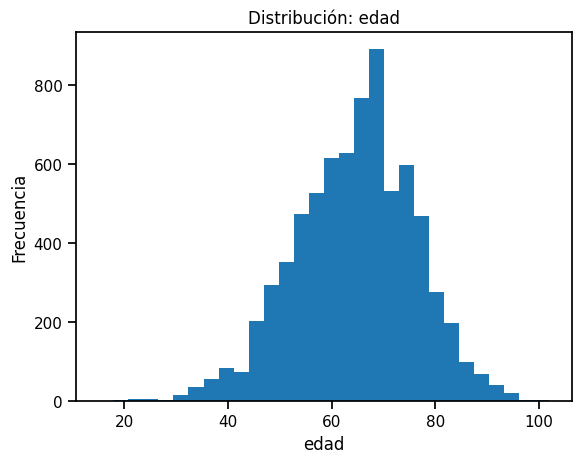

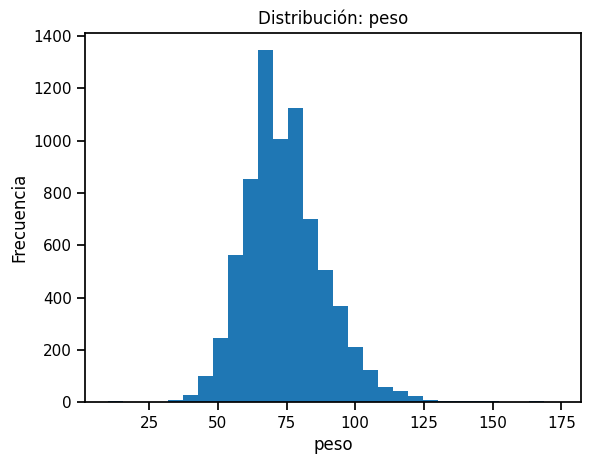

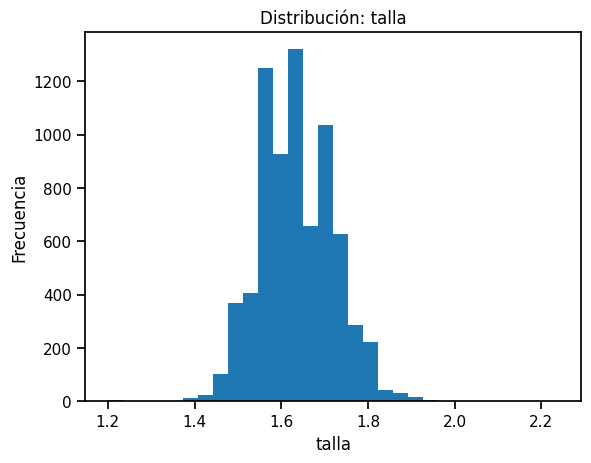

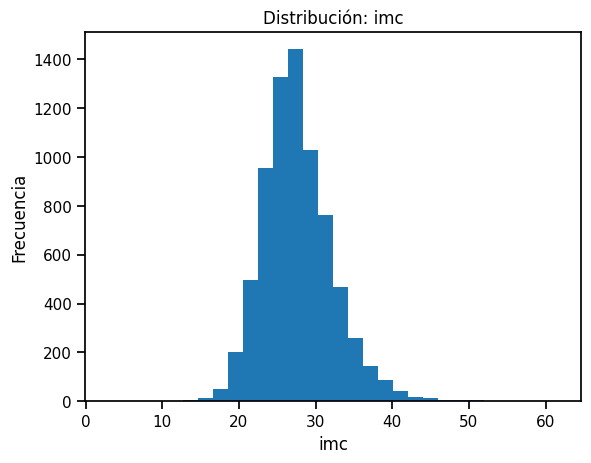

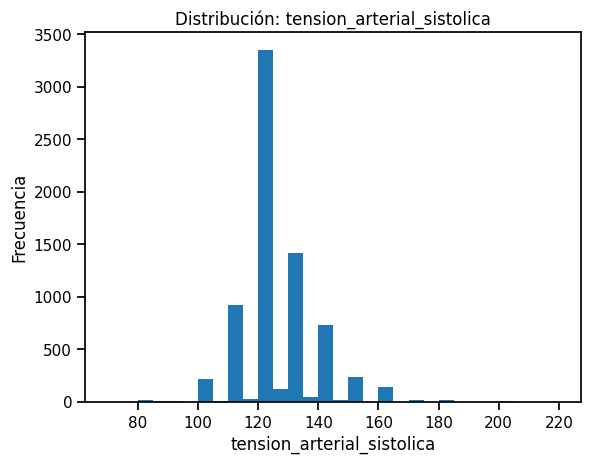

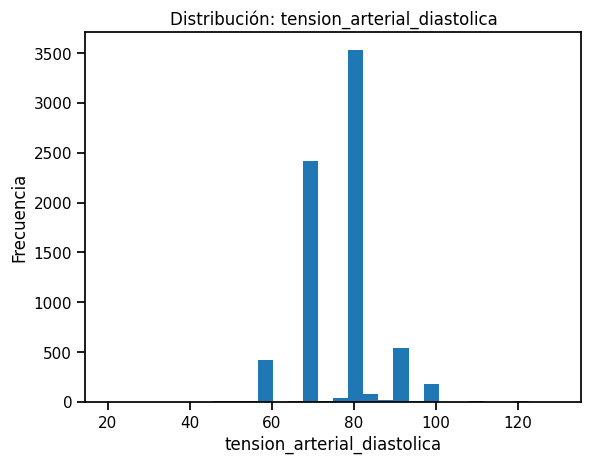

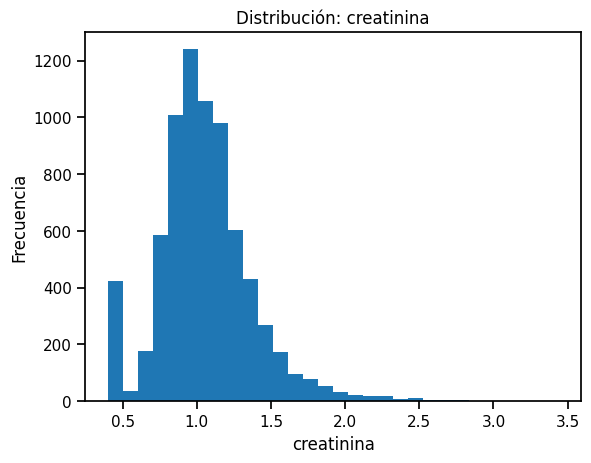

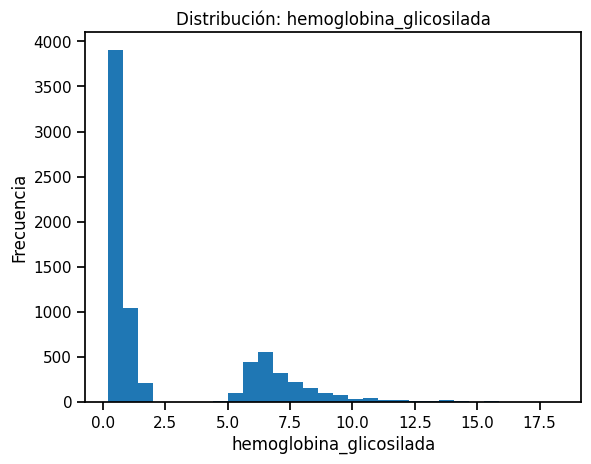

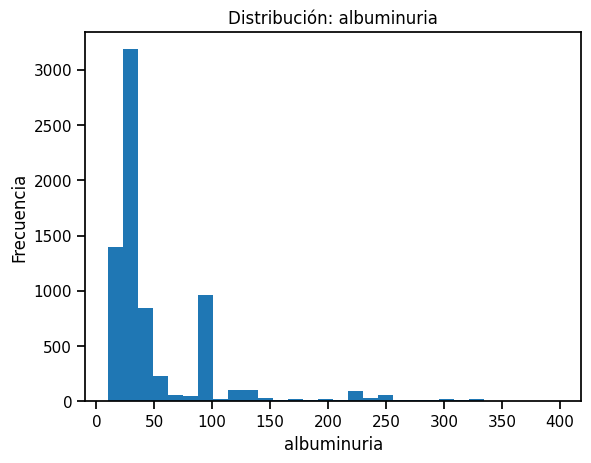

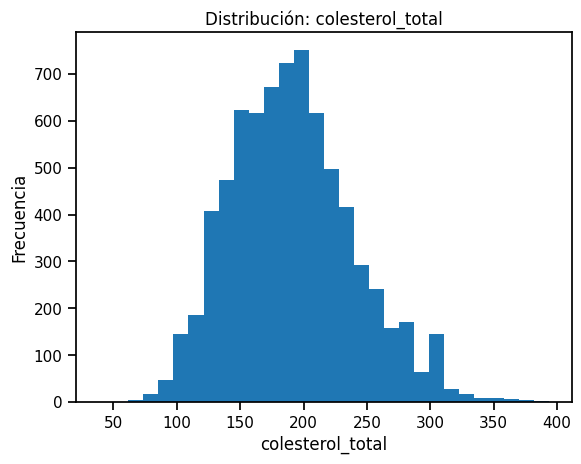

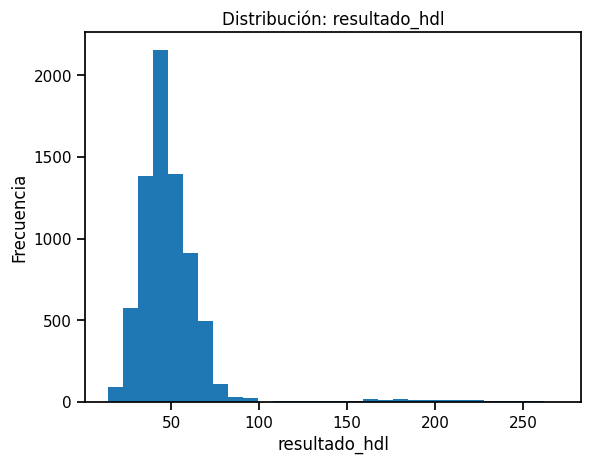

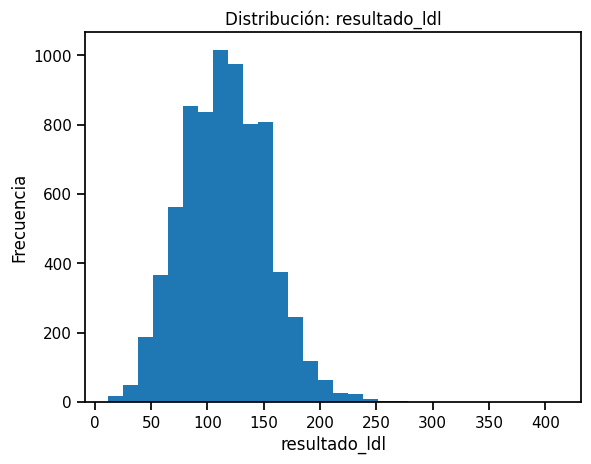

In [ ]:
#Distribución de variables númericas

num_cols = df.select_dtypes(include=["number"]).columns.tolist()
excluir_cols = ["longitud","latitud", "municipio_divipola", "clasificacion_imc"]
num_cols_validas = [c for c in num_cols if c not in excluir_cols]

for col in num_cols_validas[:12]:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribución: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Fase II — Preparación y Preprocesamiento

In [ ]:
#Variables

vars_numericas = [
    'edad', 'peso', 'talla', 'imc',
    'tension_arterial_sistolica', 'tension_arterial_diastolica',
    'creatinina', 'hemoglobina_glicosilada', 'albuminuria',
    'colesterol_total', 'resultado_hdl', 'resultado_ldl'
]

vars_categoricas = [
    'sexo', 'curso_vida', 'clasificacion_imc'
]

# Convertir numéricas
for col in vars_numericas:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Normalizar categóricas
for col in vars_categoricas:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().replace({"nan": np.nan, "None": np.nan})

In [ ]:
# Reglas clínicas simples para depurar errores evidentes

def set_nan_if_out_of_range(s, low=None, high=None):
    s = s.copy()
    if low is not None:
        s = s.where(s >= low, np.nan)
    if high is not None:
        s = s.where(s <= high, np.nan)
    return s


# Aplicar reglas clínicas

if 'edad' in df.columns:
    df['edad'] = set_nan_if_out_of_range(df['edad'], low=0, high=110)

if 'tension_arterial_sistolica' in df.columns:
    df['tension_arterial_sistolica'] = set_nan_if_out_of_range(
        df['tension_arterial_sistolica'], low=60, high=260
    )

if 'tension_arterial_diastolica' in df.columns:
    df['tension_arterial_diastolica'] = set_nan_if_out_of_range(
        df['tension_arterial_diastolica'], low=30, high=160
    )

if 'imc' in df.columns:
    df['imc'] = set_nan_if_out_of_range(df['imc'], low=10, high=70)

In [ ]:
#Definir variable objetivo (target)


# Inicializar contador de factores de riesgo
df['factores_riesgo'] = 0

# Hipertensión
df.loc[
    (df['tension_arterial_sistolica'] >= 140) |
    (df['tension_arterial_diastolica'] >= 90),
    'factores_riesgo'
] += 1

# Dislipidemia
df.loc[
    (df['resultado_ldl'] >= 130) |
    (df['colesterol_total'] >= 200),
    'factores_riesgo'
] += 1

# Diabetes (HbA1c)
df.loc[
    df['hemoglobina_glicosilada'] >= 6.5,
    'factores_riesgo'
] += 1

# Sobrepeso u obesidad
df.loc[
    df['imc'] >= 25,
    'factores_riesgo'
] += 1

# Daño renal (albuminuria elevada)
df.loc[
    df['albuminuria'] > 300,
    'factores_riesgo'
] += 1

# Crear variable objetivo binaria
df['riesgo_cardiovascular'] = np.where(
    df['factores_riesgo'] >= 2, 1, 0
)

# Ver distribución
df['riesgo_cardiovascular'].value_counts(normalize=True).round(3)


,proportion
riesgo_cardiovascular,
1,0.515
0,0.485


In [ ]:
df['factores_riesgo'].value_counts().sort_index()


,count
factores_riesgo,
0,828
1,2732
2,2720
3,965
4,92
5,2


In [ ]:
# Definir variable objetivo (target) y preparar dataset

target = 'riesgo_cardiovascular'
if target not in df.columns:
    raise ValueError(f"No encuentro la columna objetivo '{target}'.")

# Por seguridad: quedarnos solo con filas donde el target NO sea NaN
df = df.dropna(subset=[target]).copy()

# Asegurar que target sea binario 0/1
df[target] = df[target].astype(int)
if set(df[target].unique()) - {0, 1}:
    raise ValueError("El target no quedó binario (0/1)")

# Mantener solo columnas necesarias
cols_modelo = [c for c in (vars_numericas + vars_categoricas + [target]) if c in df.columns]
df_modelo = df[cols_modelo].copy()

# Separar X e y
X = df_modelo.drop(columns=[target])
y = df_modelo[target]


In [ ]:
# Preprocesadores (imputación + encoding + escalado)

# Numéricas: imputación por mediana
num_pipeline_rf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# Numéricas para logística: imputación + estandarización
num_pipeline_logreg = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categóricas: imputación + one-hot
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformers
preprocess_logreg = ColumnTransformer(
    transformers=[
        ("num", num_pipeline_logreg, [c for c in vars_numericas if c in X.columns]),
        ("cat", cat_pipeline, [c for c in vars_categoricas if c in X.columns])
    ],
    remainder="drop"
)

preprocess_rf = ColumnTransformer(
    transformers=[
        ("num", num_pipeline_rf, [c for c in vars_numericas if c in X.columns]),
        ("cat", cat_pipeline, [c for c in vars_categoricas if c in X.columns])
    ],
    remainder="drop"
)

In [ ]:
#Listo para modelar)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print("\n✅ Datos listos")
print("Train:", X_train.shape, "Test:", X_test.shape)
print("Distribución del target (train):")
print(y_train.value_counts(normalize=True).round(3))



✅ Datos listos
Train: (5137, 15) Test: (2202, 15)
Distribución del target (train):
riesgo_cardiovascular
1    0.515
0    0.485
Name: proportion, dtype: float64


# Fase III. Modelado Predictivo del Riesgo Cardiovascular

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [ ]:
# Regresión Logística

pipe_logreg = Pipeline(steps=[
    ("preprocess", preprocess_logreg),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
])


In [ ]:
# Random Forest

pipe_rf = Pipeline(steps=[
    ("preprocess", preprocess_rf),
    ("model", RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced",
        max_depth=None,
        n_jobs=-1
    ))
])

In [ ]:
# XGBoost

pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
scale_pos_weight = neg / pos if pos > 0 else 1

pipe_xgb = Pipeline(steps=[
    ("preprocess", preprocess_rf),
    ("model", XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        eval_metric="logloss",
        scale_pos_weight=scale_pos_weight
    ))
])


In [ ]:
# Entrenar y evaluar modelos en un solo bloque

modelos = {
    "LogisticRegression": pipe_logreg,
    "RandomForest": pipe_rf,
    "XGBoost": pipe_xgb
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
        "AUC": roc_auc_score(y_test, y_prob)
    })

    print(f"\n===== {nombre} =====")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

df_resultados = pd.DataFrame(resultados).sort_values(by="AUC", ascending=False)
df_resultados



===== LogisticRegression =====
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1068
           1       0.87      0.88      0.88      1134

    accuracy                           0.87      2202
   macro avg       0.87      0.87      0.87      2202
weighted avg       0.87      0.87      0.87      2202

Matriz de confusión:
 [[924 144]
 [138 996]]

===== RandomForest =====
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1068
           1       0.99      0.99      0.99      1134

    accuracy                           0.99      2202
   macro avg       0.99      0.99      0.99      2202
weighted avg       0.99      0.99      0.99      2202

Matriz de confusión:
 [[1061    7]
 [  11 1123]]

===== XGBoost =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00      1134

    accur

,Modelo,Accuracy,Precision,Recall,F1,AUC
2,XGBoost,0.998183,0.998236,0.998236,0.998236,0.999988
1,RandomForest,0.991826,0.993805,0.990300,0.992049,0.999810
0,LogisticRegression,0.871935,0.873684,0.878307,0.875989,0.945230


<Figure size 700x500 with 0 Axes>

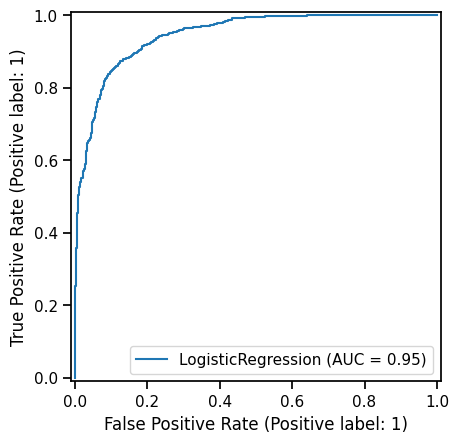

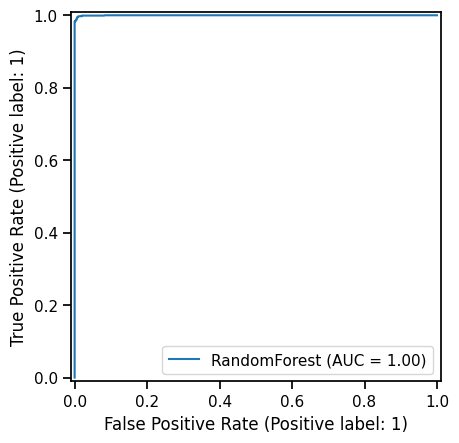

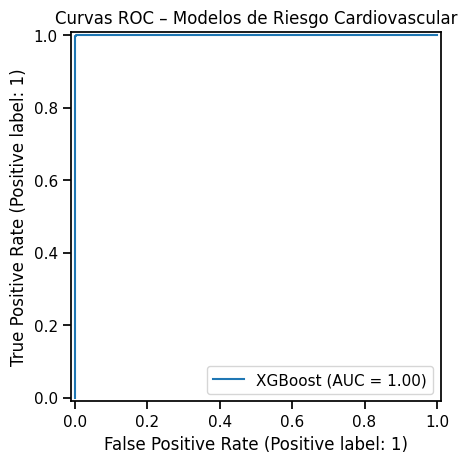

In [ ]:
# Curvas ROC comparadas

plt.figure(figsize=(7,5))

for nombre, modelo in modelos.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob, name=nombre)

plt.title("Curvas ROC – Modelos de Riesgo Cardiovascular")
plt.show()


In [ ]:
#Importancia de variables (Random Forest y XGBoost)


rf_model = pipe_rf.named_steps["model"]
rf_pre = pipe_rf.named_steps["preprocess"]

feature_names = rf_pre.get_feature_names_out()
importances = rf_model.feature_importances_

imp_rf = (
    pd.DataFrame({"feature": feature_names, "importance": importances})
    .sort_values("importance", ascending=False)
    .head(15)
)

imp_rf


,feature,importance
9,num__colesterol_total,0.202033
7,num__hemoglobina_glicosilada,0.160159
11,num__resultado_ldl,0.153574
3,num__imc,0.116385
4,num__tension_arterial_sistolica,0.106803
20,cat__clasificacion_imc_Normal,0.063962
5,num__tension_arterial_diastolica,0.051034
1,num__peso,0.034520
10,num__resultado_hdl,0.020644
22,cat__clasificacion_imc_Sobrepeso,0.019845


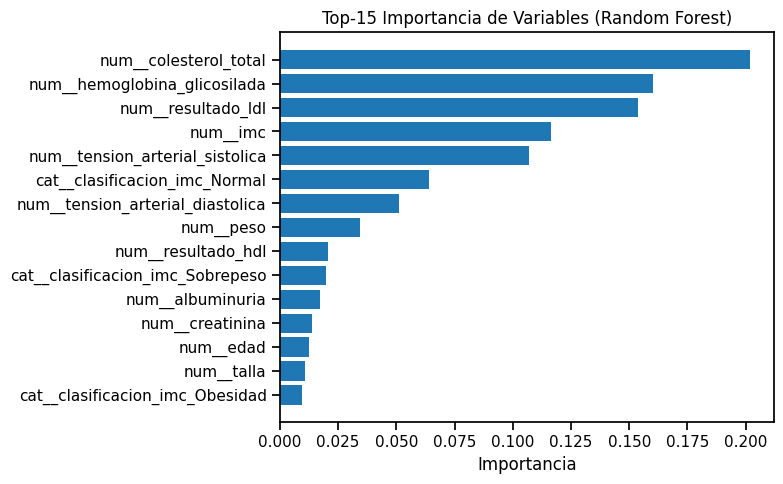

In [ ]:
#Top-15

plt.figure(figsize=(8,5))
plt.barh(imp_rf["feature"][::-1], imp_rf["importance"][::-1])
plt.title("Top-15 Importancia de Variables (Random Forest)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


In [ ]:
#XGBoost (importancia)
xgb_model = pipe_xgb.named_steps["model"]
xgb_pre = pipe_xgb.named_steps["preprocess"]

feature_names_xgb = xgb_pre.get_feature_names_out()
importances_xgb = xgb_model.feature_importances_

imp_xgb = (
    pd.DataFrame({"feature": feature_names_xgb, "importance": importances_xgb})
    .sort_values("importance", ascending=False)
    .head(15)
)

imp_xgb


,feature,importance
20,cat__clasificacion_imc_Normal,0.236858
9,num__colesterol_total,0.158825
3,num__imc,0.124052
4,num__tension_arterial_sistolica,0.115434
7,num__hemoglobina_glicosilada,0.104067
19,cat__clasificacion_imc_Delgadez o bajo peso,0.089262
11,num__resultado_ldl,0.068684
5,num__tension_arterial_diastolica,0.062566
8,num__albuminuria,0.016142
1,num__peso,0.006987


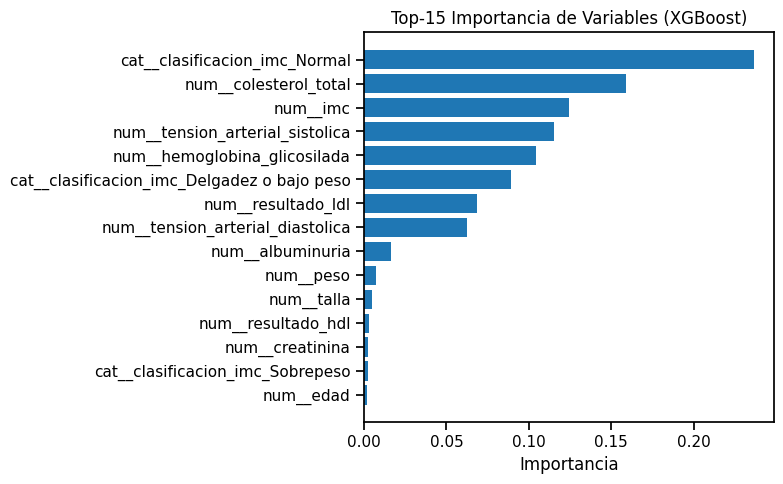

In [ ]:
#Top 15
plt.figure(figsize=(8,5))
plt.barh(imp_xgb["feature"][::-1], imp_xgb["importance"][::-1])
plt.title("Top-15 Importancia de Variables (XGBoost)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3841928434.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  riesgo_edad = df.groupby("grupo_edad")["riesgo_cardiovascular"].mean()


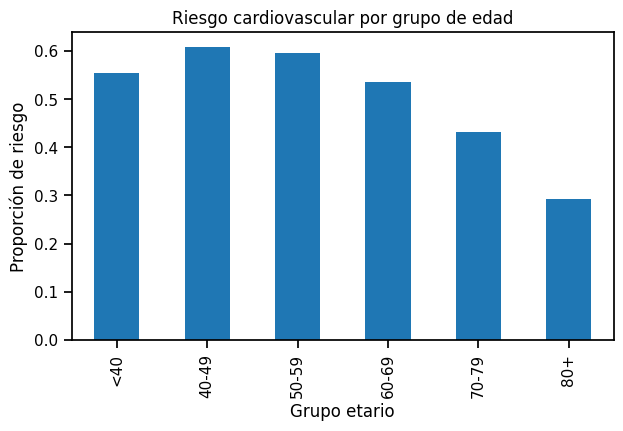

In [ ]:
# Distribuciones del riesgo por edad


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df["grupo_edad"] = pd.cut(
    df["edad"],
    bins=[0,40,50,60,70,80,120],
    labels=["<40","40-49","50-59","60-69","70-79","80+"]
)

riesgo_edad = df.groupby("grupo_edad")["riesgo_cardiovascular"].mean()

plt.figure(figsize=(7,4))
riesgo_edad.plot(kind="bar")
plt.ylabel("Proporción de riesgo")
plt.xlabel("Grupo etario")
plt.title("Riesgo cardiovascular por grupo de edad")
plt.show()




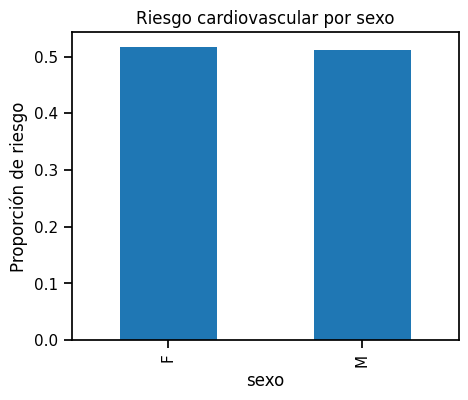

In [ ]:
# Distribución del riesgo por sexo

riesgo_sexo = df.groupby("sexo")["riesgo_cardiovascular"].mean()

plt.figure(figsize=(5,4))
riesgo_sexo.plot(kind="bar")
plt.ylabel("Proporción de riesgo")
plt.title("Riesgo cardiovascular por sexo")
plt.show()


/tmp/ipython-input-1165422229.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  riesgo_imc = df.groupby("imc_categoria")["riesgo_cardiovascular"].mean()


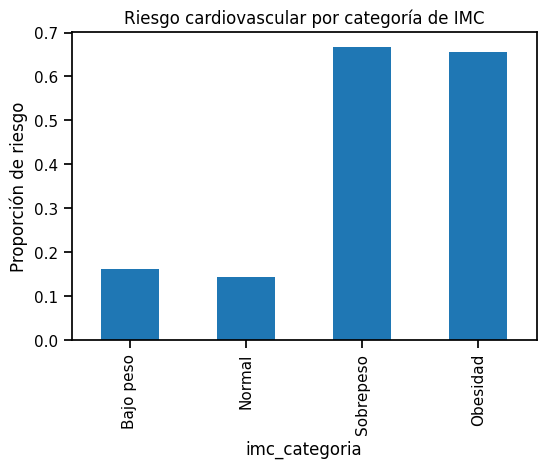

In [ ]:
#Riesgo por rangos de IMC

df["imc_categoria"] = pd.cut(
    df["imc"],
    bins=[0,18.5,25,30,100],
    labels=["Bajo peso","Normal","Sobrepeso","Obesidad"]
)

riesgo_imc = df.groupby("imc_categoria")["riesgo_cardiovascular"].mean()

plt.figure(figsize=(6,4))
riesgo_imc.plot(kind="bar")
plt.ylabel("Proporción de riesgo")
plt.title("Riesgo cardiovascular por categoría de IMC")
plt.show()
